In [2]:
# Copy number of last image in the folder
number_of_copies=50
import shutil

# Base name of the image file
base_name = "imgs_Pessoa/frame_1000"
extension = ".png"  # Change this to the appropriate file extension if needed
counter=1000

# Loop to create 50 copies with incremented names
for i in range(1, 51):
    new_file_name=base_name.split("/")[1]
    new_file_name=new_file_name.split("_")[0]
    new_name = f"imgs_Pessoa/{new_file_name}_{counter+i}{extension}"
    shutil.copy(f"{base_name}{extension}", new_name)

print("50 copies created successfully.")

50 copies created successfully.


In [12]:
import cv2
import os
import re
import subprocess

audio_file_path = "2089db4f-a8a2-4351-8100-46d58444b43b.mp3"
output_video_with_audio= "Ante_la_puesta_de_sol.mp4"
frames_dir = "imgs_Pessoa2"
header_image_path = "coem_1080_840.png"
output_video_no_audio = "Ante_la_puesta_de_sol_NA.mp4"
video_length_seconds = 115



# Desired video resolution
desired_width = 1080
desired_height = 1920

# Function to sort frame filenames numerically
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return int(parts[1])

# Get list of all frame filenames and sort them numerically
frame_files = sorted([f for f in os.listdir(frames_dir) if f.startswith("frame_") and f.endswith(".png")], key=numerical_sort)

# Read the first frame to get the frame size and reshape it
first_frame = cv2.imread(os.path.join(frames_dir, frame_files[0]))
frame_height, frame_width, _ = first_frame.shape
first_frame = cv2.resize(first_frame, (1080, 1080))

# Load and resize the header image
header_image = cv2.imread(header_image_path)
header_height, header_width, _ = header_image.shape
header_image = cv2.resize(header_image, (1080, 840))

# Calculate the frames per second (fps)
total_frames = len(frame_files)
fps = total_frames / video_length_seconds

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_no_audio, fourcc, fps, (desired_width, desired_height))

# Add each frame to the video
for frame_file in frame_files:
    frame = cv2.imread(os.path.join(frames_dir, frame_file))
    frame = cv2.resize(frame, (1080, 1080))
    combined_image = cv2.vconcat([header_image, frame])

    # Resize to fit the desired resolution if necessary
    if combined_image.shape[1] != desired_width or combined_image.shape[0] != desired_height:
        combined_image = cv2.resize(combined_image, (desired_width, desired_height))

    video_writer.write(combined_image)

# Release the VideoWriter object
video_writer.release()

print("video created")
#Add Audio

subprocess.call([
    'ffmpeg',
    '-i', output_video_no_audio,
    '-i', audio_file_path,
    '-c:v', 'copy',
    '-c:a', 'aac',
    '-strict', 'experimental',
    '-shortest',
    output_video_with_audio
])
os.remove(output_video_no_audio)


Video created successfully: Otra_lección_NA.mp4


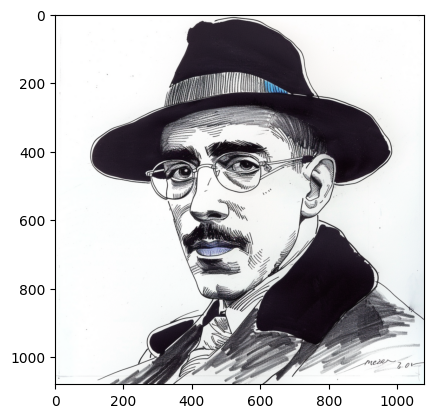

In [13]:
from matplotlib import pyplot as plt
plt.imshow(frame)
plt.show()

In [15]:
output_video_final="Ante_la_puesta_de_sol_wp.mp4"
subprocess.call([
    'ffmpeg',
    '-i', output_video_with_audio,
    '-vcodec', 'libx264',
    '-acodec', 'aac',
    '-strict', 'experimental',
    '-b:a', '192k',
    '-pix_fmt', 'yuv420p',
    output_video_final
])


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

0